In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


In [2]:
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import History


The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

* **input_dim**: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
* **output_dim**: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
* **input_length**: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

# Zad. 
Podążamy za stroną: 

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

mamy jakiś zbiór tekstów:

In [3]:
# define documents
docs = ['Well done!',
    'Good work',
    'Great effort',
    'nice work',
    'Excellent!',
    'Weak',
    'Poor effort!',
    'not good',
    'poor work',
    'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])

* Do warstwy **Embedding layer** wchodzi sekwencja intów.

* my wykorzystamy reprezenatację Bag of Words

In [4]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[43, 33], [20, 18], [18, 30], [42, 18], [14], [13], [11, 30], [4, 20], [11, 18], [16, 42, 33, 14]]


Sekwencje mają różne długości, a Keras wymaga aby wejścia były równej długość.

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[43 33  0  0]
 [20 18  0  0]
 [18 30  0  0]
 [42 18  0  0]
 [14  0  0  0]
 [13  0  0  0]
 [11 30  0  0]
 [ 4 20  0  0]
 [11 18  0  0]
 [16 42 33 14]]


* Embeding ma rakres 50 i długość wejściową 4. Zmniejszmy embending do wymiaru 8.
* Model jest prostym klasyfikatorem binarnym. 
* Co ważne, wynik z warstwy Embeding będzie wynosił 4 wektory o 8 wymiarach każdy, po jednym dla każdego słowa. 
* Spłaszczamy to do jednego 32-elementowego wektora, aby przejść do warstwy wyjściowej Dense.

In [6]:
history_1 = History()
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 80.000001


In [7]:
# # compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# # fit the model
# model.fit(padded_docs, labels, epochs=50, verbose=0)

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
model.fit(padded_docs, labels, epochs=100, validation_split=0.1, callbacks=[history_1])

Epoch 1/100
1/1 [==============================] - 0s 102ms/step - loss: 0.6429 - accuracy: 0.7778 - val_loss: 0.5054 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6417 - accuracy: 0.7778 - val_loss: 0.5054 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6405 - accuracy: 0.7778 - val_loss: 0.5054 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6394 - accuracy: 0.7778 - val_loss: 0.5054 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6382 - accuracy: 0.7778 - val_loss: 0.5053 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6370 - accuracy: 0.7778 - val_loss: 0.5052 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6358 - accuracy: 0.7778 - val_loss: 0.5051 - val_accuracy: 1.0000
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 17ms/step - loss: 0.5675 - accuracy: 0.8889 - val_loss: 0.4908 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5660 - accuracy: 0.8889 - val_loss: 0.4904 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5645 - accuracy: 0.8889 - val_loss: 0.4899 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5629 - accuracy: 0.8889 - val_loss: 0.4895 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5614 - accuracy: 0.8889 - val_loss: 0.4891 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5599 - accuracy: 0.8889 - val_loss: 0.4887 - val_accuracy: 1.0000
Epoch 65/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5583 - accuracy: 0.8889 - val_loss: 0.4882 - val_accuracy: 1.0000
Epoch 66/100
1/1 [========

In [8]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


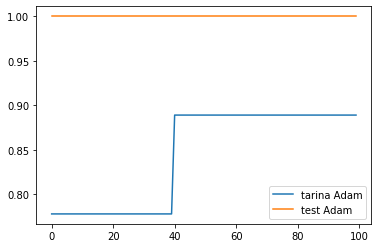

In [9]:
plt.plot(history_1.history['accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Pretrain embedding

https://keras.io/examples/pretrained_word_embeddings/

* GloVe embedding data can be found at: http://nlp.stanford.edu/data/glove.6B.zip (source page: http://nlp.stanford.edu/projects/glove/)

* After downloading and unzipping, you will see a few files, one of which is “glove.6B.50d.txt“, which contains a 100-dimensional version of the embedding.


Pojedyńczy plik można pobrać z tąd:
https://www.dropbox.com/sh/tjq47ybybgnrbel/AAAVbp0UkQTAbKWVMIi5mtHpa?dl=0

In [10]:
BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B.50d')

# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
# file = open(filename, encoding="utf8")
with open(os.path.join(GLOVE_DIR, 'glove.6B.50d.txt'), encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs
        

print('Loaded %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Loaded 400000 word vectors.


In [11]:
embeddings_index["the"]

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

In [12]:
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])

Keras provides a Tokenizer class that can be fit on the training data, can convert text to sequences consistently by calling the texts_to_sequences() method on the Tokenizer class, and provides access to the dictionary mapping of words to integers in a word_index attribute.

https://keras.io/preprocessing/text/#tokenizer

In [13]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

In [14]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


Sekwencje mają różne długości, a Keras wymaga aby wejścia były równej długość.

In [15]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


Next, we need to create a matrix of one embedding for each word in the training dataset. We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded GloVe embedding.

The result is a matrix of weights only for words we will see during training.

In [16]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embedding_matrix.shape        

(15, 50)

In [17]:
embedding_matrix[1]

array([ 5.13589978e-01,  1.96950004e-01, -5.19439995e-01, -8.62179995e-01,
        1.54940002e-02,  1.09729998e-01, -8.02929997e-01, -3.33609998e-01,
       -1.61189993e-04,  1.01889996e-02,  4.67340015e-02,  4.67510015e-01,
       -4.74750012e-01,  1.10380001e-01,  3.93269986e-01, -4.36520010e-01,
        3.99839997e-01,  2.71090001e-01,  4.26499993e-01, -6.06400013e-01,
        8.11450005e-01,  4.56299990e-01, -1.27260000e-01, -2.24739999e-01,
        6.40709996e-01, -1.27670002e+00, -7.22310007e-01, -6.95900023e-01,
        2.80450005e-02, -2.30719998e-01,  3.79959989e+00, -1.26249999e-01,
       -4.79669988e-01, -9.99719977e-01, -2.19760001e-01,  5.05649984e-01,
        2.59530004e-02,  8.05140018e-01,  1.99290007e-01,  2.87959993e-01,
       -1.59150004e-01, -3.04380000e-01,  1.60249993e-01, -1.82899997e-01,
       -3.85629982e-02, -1.76190004e-01,  2.70409994e-02,  4.68420014e-02,
       -6.28970027e-01,  3.57259989e-01])

In [19]:
embedding_matrix[2]

array([ 3.30760002e-01, -4.38699991e-01, -3.21630001e-01, -4.93099988e-01,
        1.02540001e-01, -2.74210004e-03, -5.17199993e-01,  2.43360009e-02,
       -1.28160000e-01,  1.43490002e-01, -1.66909993e-01,  5.61209977e-01,
       -5.62409997e-01, -4.09720019e-02,  7.50000000e-01,  2.30839998e-01,
        5.32040000e-01, -4.09730002e-02,  2.68920004e-01, -6.92380011e-01,
        2.78829992e-01,  3.79110008e-01,  5.63899994e-01, -3.81500006e-01,
        7.21319973e-01, -1.35619998e+00, -8.17170024e-01, -5.48419990e-02,
        5.73329985e-01, -8.54889989e-01,  3.18889999e+00,  1.99180007e-01,
       -4.21200007e-01, -9.04269993e-01, -1.95209995e-01,  3.01109999e-01,
        4.67559993e-01,  8.21300030e-01,  6.05520010e-02, -1.61430001e-01,
       -2.66680002e-01, -1.76599994e-01,  1.58200003e-02,  2.55279988e-01,
       -9.67390016e-02, -9.72819999e-02, -8.44829977e-02,  3.33119988e-01,
       -2.22519994e-01,  7.44570017e-01])

The key difference is that the embedding layer can be seeded with the GloVe word embedding weights. We chose the 50-dimensional version, therefore the Embedding layer must be defined with output_dim set to 50. Finally, we do not want to update the learned word weights in this model, therefore we will set the trainable attribute for the model to be False.

In [20]:
e = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=4, trainable=False)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import History

history_2 = History()
model = Sequential()
e = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 50)             750       
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 951
Trainable params: 201
Non-trainable params: 750
_________________________________________________________________
None


In [22]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
model.fit(padded_docs, labels, epochs=100, validation_split=0.1, callbacks=[history_2])

Epoch 1/100
1/1 [==============================] - 0s 103ms/step - loss: 0.7574 - accuracy: 0.4444 - val_loss: 0.9379 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7487 - accuracy: 0.4444 - val_loss: 0.9481 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7401 - accuracy: 0.4444 - val_loss: 0.9584 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7317 - accuracy: 0.4444 - val_loss: 0.9687 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.7235 - accuracy: 0.4444 - val_loss: 0.9791 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7156 - accuracy: 0.4444 - val_loss: 0.9894 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7078 - accuracy: 0.4444 - val_loss: 0.9999 - val_accuracy: 0.

1/1 [==============================] - 0s 17ms/step - loss: 0.4841 - accuracy: 0.8889 - val_loss: 1.3183 - val_accuracy: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4810 - accuracy: 0.8889 - val_loss: 1.3194 - val_accuracy: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4779 - accuracy: 0.8889 - val_loss: 1.3205 - val_accuracy: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4748 - accuracy: 0.8889 - val_loss: 1.3216 - val_accuracy: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4717 - accuracy: 0.8889 - val_loss: 1.3227 - val_accuracy: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4687 - accuracy: 0.8889 - val_loss: 1.3238 - val_accuracy: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4657 - accuracy: 0.8889 - val_loss: 1.3249 - val_accuracy: 0.0000e+0

In [23]:
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


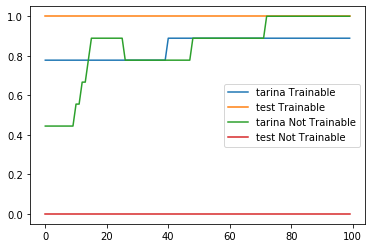

In [24]:
plt.plot(history_1.history['accuracy'], label = "tarina Trainable")
plt.plot(history_1.history['val_accuracy'], label = "test Trainable")

plt.plot(history_2.history['accuracy'], label = "tarina Not Trainable")
plt.plot(history_2.history['val_accuracy'], label = "test Not Trainable")


plt.legend()
plt.show()